In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Attention Is All You Need
https://arxiv.org/abs/1706.03762

The Annotated Transformer
https://nlp.seas.harvard.edu/2018/04/03/attention.html

The Illustrated Transformer
https://jalammar.github.io/illustrated-transformer/

## 시퀀스-투-시퀀스
- 특정 속성을 지닌 시퀀스를 다른 속성의 시퀀스로 변환하는 작업.
- 트랜스포머는 2017년 구글이 제안한 시퀀스-투-시퀀스 모델.
- 어텐션 메커니즘 활용. 기계 번역에서 입력 문장을 인코딩하고 출력 문장을 디코딩하는 과정에서 어텐션 메커니즘은 디코더가 입력 문장의 적절한 부분에 "주목"하여 출력 문장의 각 단어를 더 정확하게 생성
- 기계 번역이란 어떤 언어(소스 언어, source language)의 단어 시퀀스를 다른 언어(대상 언어, target language)의 단어 시퀀스로 변환하는 과제
  - 어제, 카페, 갔었어, 거기, 사람, 많더라 > I, went, to, the, cafe, There, were, many, people, there
  - 소스 시퀀스의 길이(단어 6개)와 타깃 시퀀스의 길이(10개)
  - 인코더가 한국어 문장을 압축해 디코더에 보내고, 디코더는 이를 받아 영어로 번역

## "Transformer"
- 딥 러닝 모델에서 널리 사용되는 아키텍처 중 하나이며 2017년에 "Attention is All You Need"라는 논문에서 처음 소개.
- 트랜스포머는 RNN과 LSTM이 시퀀스의 연속적인 특성에 의존하는 것과 대조적으로, 전체 시퀀스를 한 번에 처리하고 각 단어가 다른 모든 단어와의 관계를 동시에 고려
- Transformer는 텍스트, 이미지 등 다양한 종류의 데이터를 처리할 수 있는 아키텍처로, NLP(자연어 처리) 분야에서 특히 중요한 역할
- OpenAI의 GPT-4, Google의 BERT 등 현재 가장 성능이 좋은 모델들도 Transformer 아키텍처를 기반으로 만들어짐
- Transformer는 다음과 같은 주요한 요소들로 구성
  - Self-attention Mechanism: 셀프 어텐션(self-attention)은 일반적인 어텐션 메커니즘의 한 종류이며 입력 시퀀스의 각 요소가 다른 요소들과 얼마나 관련되어 있는지를 결정하는데 사용되는 메커니즘이며 이를 통해 모델은 각 단어 또는 픽셀이 문맥 내에서 어떻게 상호 작용하는지를 학습.
  - Positional Encoding (위치 인코딩): Transformer는 입력 데이터의 순서를 고려하지 않는다는 단점이 있으며 이 문제를 해결하기 위해, 각 입력 요소의 위치 정보를 추가하는 것이 위치 인코딩. 이를 통해 모델은 단어나 이미지 픽셀의 상대적인 또는 절대적인 위치를 이해할 수 있게 함
  - Multi-Head Attention (멀티-헤드 어텐션): 이는 Self-attention 메커니즘을 여러 번 반복하여 서로 다른 '관점'에서 데이터를 처리하는 것을 가능하게 하며 각 '헤드'는 데이터의 서로 다른 특성에 집중하게 된다.
  - Feed-Forward Neural Networks (전방향 신경망): 각 Self-attention 단계 이후에는 전방향 신경망이 사용. 이 신경망은 각 위치에서 독립적으로 동작하므로 병렬 계산이 가능.  
  - Residual Connections(잔차 연결)
    - 잔차 연결이란 블록(block) 계산을 건너뛰는 경로를 하나 두는 것을 의미
    - 입력을 x , 이번 계산 대상 블록을 F 라고 할 때 잔차 연결은 F(x)+x 로 간단히 실현
    - 딥러닝 모델은 레이어가 많아지면 학습이 어려운 경향이 있는데 모델을 업데이트하기 위한 신호(그래디언트)가 전달되는 경로가 길어지기 때문이다. 잔차 연결은 그래디언트가 직접적으로 더 앞 단의 레이어로 흐를 수 있는 '지름길'을 제공하여 역전파 시 그래디언트 소실 문제를 완화하는 데 도움을 줍니다.
  - Layer Normalization(레이어 정규화)
    - 미니 배치의 인스턴스( x )별로 평균을 빼주고 표준편차로 나눠줘 정규화(normalization)을 수행하는 기법
    - 레이어 정규화를 수행하면 학습이 안정되고 그 속도가 빨라지는 등의 효과

이러한 구성 요소들을 통해 Transformer는 문맥적인 정보를 보다 효과적으로 캡처하며, 이는 기존의 RNN이나 CNN 기반 모델들보다 더 좋은 성능을 낼 수 있도록 한다.

In [ ]:
!pip install transformers

### Hugging Face의 'transformers' 기반 번역 챗봇(ko to en)
- 모델은 OPUS-MT 프로젝트의 일부로 한영 번역 작업을 위해 사전 학습된 'Helsinki-NLP/opus-mt-ko-en' 사용
- AutoTokenizer: 이 클래스는 모델에 대한 텍스트 입력 전처리를 담당합니다. 텍스트를 토큰으로 분할하고, 모델에 필요한 특수 토큰을 추가하고, 토큰을 모델 어휘의 해당 ID로 변환하는 등 텍스트를 모델이 이해할 수 있는 형식으로 변환(토큰화)
- AutoModelForSeq2SeqLM: 이 클래스는 번역을 포함하는 시퀀스 간 언어 모델링에 적합한 모델 아키텍처를 로드합니다. 이 모델은 번역과 같은 작업에서 변환기가 작동하는 방식을 이해하는 데 기본이 되는 인코더-디코더 구조를 사용
-  KoreanToEnglishTranslator 인스턴스가 생성되면 지정된 model_name을 사용하여 토크나이저와 모델을 초기화
- 토큰화: 한국어 텍스트를 모델이 처리할 수 있는 형식으로 토큰화합니다. return_tensors="pt"는 출력이 PyTorch 텐서임을 나타내며 padding=True는 모든 시퀀스가 ​​동일한 길이로 채워지도록 보장
- 모델 생성: 'generate' 메소드가 모델 객체에서 호출됩니다. 이 방법은 인코더가 먼저 입력 시퀀스(한국어 텍스트)를 일련의 표현으로 인코딩하는 전체 시퀀스 간 생성 프로세스를 캡슐화합니다. 그런 다음 디코더는 이러한 표현을 사용하여 한 번에 하나의 토큰씩 출력 시퀀스(영어 번역)를 생성
- 디코딩: decode 메서드는 생성된 토큰 ID를 다시 읽을 수 있는 텍스트로 변환하고 처리에 사용된 특수 토큰을 생략




In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

class KoreanToEnglishTranslator:
    def __init__(self, model_name: str):
        """
        Initializes the translator model and tokenizer.
        Args:
        model_name: The name of the model to load from Hugging Face's model hub.
        """
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    def translate(self, text: str) -> str:  # 함수가 반환(return)할 값의 타입을 지정
        """
        Translates Korean text to English.
        Args:
        text: The Korean text to translate.

        Returns:
        The translated English text.
        """
        # Tokenize the text
        inputs = self.tokenizer(text, return_tensors="pt", padding=True)

        # Generate translation using the model
        outputs = self.model.generate(**inputs)

        # Decode the translated text
        translated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return translated_text

# Example usage
model_name = "Helsinki-NLP/opus-mt-ko-en"  # Example model for Korean to English translation
translator = KoreanToEnglishTranslator(model_name)

korean_text = "안녕하세요, 어떻게 지내세요?"  # Example Korean text
english_translation = translator.translate(korean_text)
print(f"Korean Text: {korean_text}")
print(f"English Translation: {english_translation}")


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Korean Text: 안녕하세요, 어떻게 지내세요?
English Translation: Hello. How are you?


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


### 트랜스포머 블록
- 인코더와 디코더 블록의 구조는 디테일에서 차이가 있을 뿐 본질적으로는 크게 다르지 않다.
- 멀티 헤드 어텐션, 피드포워드 뉴럴 네트워크, 잔차 연결 및 레이어 정규화 등 세 가지 구성 요소를 기본

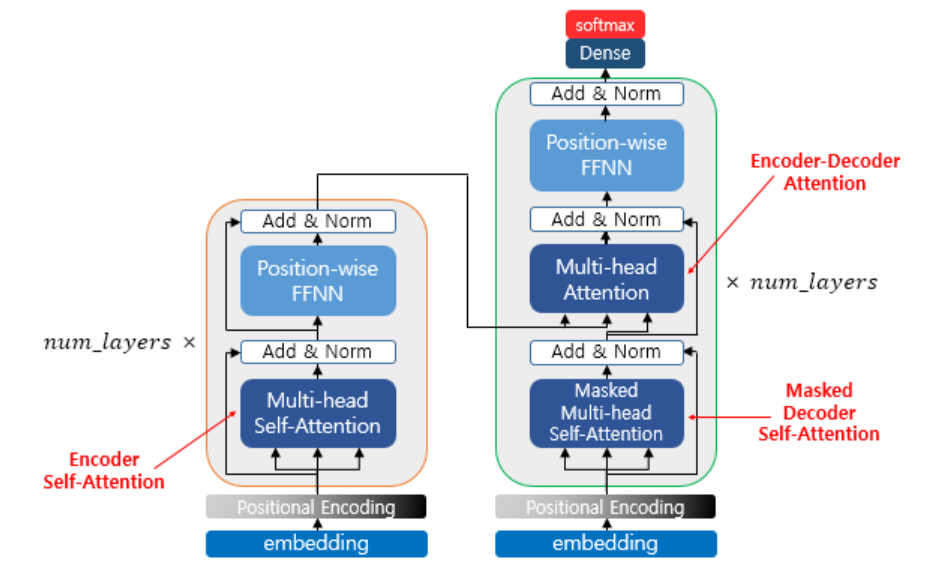

In [3]:
from IPython.display import Image
Image('/content/drive/MyDrive/ktd231026/m7_nlp응용/selfattention_image1.png', width=600, height=400)

쿼리, 키, 밸류 계산 설명

https://ratsgo.github.io/nlpbook/docs/language_model/tr_self_attention/

### 셀프 어텐션(self-attention)
- 문장이나 시퀀스 안에서 각각의 단어나 항목들이 서로 어떻게 연결되는지를 파악하는 메커니즘. 딥 러닝 모델이 단어의 문맥을 파악하게 해주는 것
- 셀프 어텐션은 어텐션 메커니즘의 한 종류로, 주어진 문장이나 시퀀스 안의 모든 단어 간의 관계를 파악

- 셀프 어텐션은 쿼리(query), 키(key), 밸류(value) 3개 요소 사이의 문맥적 관계성을 추출하는 과정
 - Query (질의): 현재에 집중하고 있는 특정 단어나 토큰을 대표. 질의는 이 토큰이 다른 토큰과 어떤 관계를 가지는지를 결정하는 데 사용.
 - Key (키): 입력 시퀀스의 각 단어나 토큰을 대표. 키는 질의와 비교되어, 질의가 특정 토큰에 얼마나 '집중'해야 하는지를 결정하는 데 사용.
 - Value (값): 입력 시퀀스의 각 단어나 토큰을 대표하며, 가중치를 적용하여 최종 출력을 생성하는 데 사용. 이 가중치는 질의와 키의 상호작용을 통해 계산.

### 셀프 어텐션 과정
1단계 : 임베딩 및 선형 변환
- 입력 준비: 입력 시퀀스의 각 토큰에 대해 query, key, value를 계산. 이를 위해 각각 별도의 학습 가능한 가중치 행렬 사용.
입력 벡터 시퀀스( X )에 쿼리, 키, 밸류를 만들어주는 행렬( W )을 각각 곱한다.
  - Q=X×WQ
  - K=X×WK
  - V=X×WV
- 스코어 계산: 쿼리 벡터와 키 벡터의 내적(dot product)을 계산하여 각 원소 간의 '스코어'를 계산합니다. 이 스코어는 주어진 단어에 대한 문장의 다른 모든 단어의 관련성을 나타내는 척도로 이해할 수 있다.  어텐션 스코어는 $스코어(i,j)=Qi​⋅KjT​$와 같이 계산된다. 이 스코어는 i라는 단어가 j라는 단어에 얼마나 집중해야 하는지를 수량화한다.

- 어텐션 스코어의 조정 : 훈련 중 기울기의 안정성을 보장하기 위해 Attention Score를 키 벡터의 차원(dk​​)의 제곱근으로 나누어 스케일링한다. 여기서 dk​는 키 벡터의 크기. 이러한 스케일링은 특히 dk가 큰 모델에서 내적 값이 지나치게 커지는 것을 방지하는 데 도움이 된다.

- 스코어 정규화: 계산된 스코어를 softmax 함수를 통해 정규화하여 확률분포를 만든다. 이 확률분포는 각 원소에 대한 가중치를 나타낸다.

- 가중합 계산: 정규화된 스코어(가중치)를 각 단어에 대한 값 벡터에 곱한 후, 모두 합하여 새로운 벡터를 생성한다. 계산식은 $출력=∑jAttention(i,j)⋅Vj$와 같으며 각 단어에 대한 이 출력 벡터에는 이제 자체 정보와 문장의 다른 단어에서 가장 관련성이 높은 정보가 혼합되어 포함된다.

- 출력 생성: 모든 입력 원소에 대해 위의 과정을 반복하고, 그 결과를 합쳐서 셀프 어텐션 레이어의 최종 출력을 생성한다. 이는 단어의 고유한 의미뿐만 아니라 문장의 다른 모든 단어와 어떻게 관련되어 있는지도 포함한다.

### 멀티헤드 어텐션
셀프 어텐션을 동시에 여러 번 수행하는 것을 의미. 비유하자면 같은 문서(입력)을 두고 독자(헤드) 여러 명이 함께 읽는 구조라 할 수 있다.

### 셀프 어텐션 구하기
- self-attention 메커니즘을 통해 모델은 문장 내 서로 다른 단어의 중요성을 서로 비교하여 가중치를 부여할 수 있습니다.
- 각 단어에 대해 이 작업을 수행하여 각 단어가 관련성에 따라 가중치가 부여된 문장의 모든 단어를 혼합한 문장의 새로운 표현을 생성합니다. 이 메커니즘은 문장 내 단어 간의 맥락과 관계를 포착하는 데 중요

In [8]:
import torch
import numpy as np
from torch.nn.functional import softmax

# 입력 텐서 준비: x, w_query, w_key, w_value는 각각 입력 시퀀스와 쿼리, 키, 밸류를 생성하기 위한 가중치 행렬
# 입력 데이터(x): 입력 시퀀스를 포함하는 텐서. 여기서 각 행은 단어 또는 토큰 나타낸다.
# 가중치 행렬: 세 개의 행렬 w_query, w_key, w_value는 입력 데이터를 각각 쿼리, 키, 값으로 변환하는 데 사용.
# 이러한 변환을 통해 모델은 각 입력 요소와 다른 모든 요소의 관련성을 결정하는 점수를 계산
x = torch.tensor([
  [1.0, 0.0, 1.0, 0.0],
  [0.0, 2.0, 0.0, 2.0],
  [1.0, 1.0, 1.0, 1.0],
])
w_query = torch.tensor([
  [1.0, 0.0, 1.0],
  [1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 1.0, 1.0]
])
w_key = torch.tensor([
  [0.0, 0.0, 1.0],
  [1.0, 1.0, 0.0],
  [0.0, 1.0, 0.0],
  [1.0, 1.0, 0.0]
])
w_value = torch.tensor([
  [0.0, 2.0, 0.0],
  [0.0, 3.0, 0.0],
  [1.0, 0.0, 3.0],
  [1.0, 1.0, 0.0]
])

# 입력 데이터 x에 대해 각각 w_query, w_key, w_value 가중치 행렬을 곱하여 쿼리, 키, 값으로 변환
# 이는 입력 시퀀스의 각 요소에 대한 쿼리, 키, 밸류 벡터를 생성하는 과정
queries = torch.matmul(x, w_query) # 쿼리는 현재 초점을 맞추고 있는 데이터의 일부를 나타낸다.
keys = torch.matmul(x, w_key) # 키는 관련성을 확인하기 위해 쿼리가 상호 작용하는 데이터 부분에 해당
values = torch.matmul(x, w_value) # 값은 쿼리와의 관련성에 따라 출력에 사용될 데이터의 실제 정보를 전달

# 어텐션 스코어는 입력 시퀀스의 여러 부분 간의 관련성을 측정
# 쿼리 행렬에 키 행렬(keys.T)의 전치를 곱하면 문장의 다른 모든 단어에 대한 모든 단어의 관련성을 나타내는 점수 집합이 계산
attn_scores = torch.matmul(queries, keys.T)
print(attn_scores, '\n')
print(keys.shape, '\n')
np.sqrt(keys.shape[-1])

# 스코어 정규화 : 특정 단어가 각 단어에 얼마나 가중치를 둘 것인가를 계산. 모든 키에 대한 스코어 합이 1이 되도록 함
key_dim_sqrt = np.sqrt(keys.shape[-1]) # 어텐션 스코어가 지나치게 커지면 역전파 중에 기울기가 매우 작아지게 될 수 있는 것을 방지
print(key_dim_sqrt, '\n')

# 소프트맥스 함수는 마지막 차원(dim=-1)을 따라 조정된 어텐션 스코어에 적용되어 이를 확률로 변환
# 소프트맥스는 해당 열 전체에서 계산되지만 계산은 해당 행단위로 수행되어 각 행에 대해 해당 열의 출력 값(소프트맥스 적용 후)의 합이 1이 되도록 처리
attn_scores_softmax = softmax(attn_scores / key_dim_sqrt, dim=-1)
attn_scores_softmax
print('''softmax 결과값:
각 행은 입력 시퀀스의 한 위치에 대한 어텐션 가중치를 나타내며,
각 열은 해당 위치에서 다른 위치로의 상대적인 주의도를 나타냅니다.
이 결과값은 확률로 해석될 수 있으며, 각 행의 값들의 합은 1입니다.
이는 모델이 어떤 위치에 얼마나 주의를 기울이는지를 나타내는 확률 분포입니다. ''', '\n')
print(attn_scores_softmax, '\n')

# 특정 쿼리에 대해 sum을 계산
attn_scores_softmax[2].sum()

# 가중합 계산: 정규화된 스코어를 각 값 벡터에 곱한 후, 모두 합하여 새로운 벡터를 생성하여 쿼리 단어의 문맥을 반영한 표현을 생성
weighted_values = torch.matmul(attn_scores_softmax, values)
weighted_values

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]]) 

torch.Size([3, 3]) 

1.7320508075688772 

softmax 결과값:
각 행은 입력 시퀀스의 한 위치에 대한 어텐션 가중치를 나타내며,
각 열은 해당 위치에서 다른 위치로의 상대적인 주의도를 나타냅니다.
이 결과값은 확률로 해석될 수 있으며, 각 행의 값들의 합은 1입니다.
이는 모델이 어떤 위치에 얼마나 주의를 기울이는지를 나타내는 확률 분포입니다.  

tensor([[1.3613e-01, 4.3194e-01, 4.3194e-01],
        [8.9045e-04, 9.0884e-01, 9.0267e-02],
        [7.4449e-03, 7.5471e-01, 2.3785e-01]]) 



tensor([[1.8639, 6.3194, 1.7042],
        [1.9991, 7.8141, 0.2735],
        [1.9926, 7.4796, 0.7359]])

In [6]:
attn_scores_softmax
attn_scores_softmax[2].sum()

tensor(1.)

### 피드포워드 뉴럴네트워크 계산
- 멀티 헤드 어텐션의 출력은 입력 단어들에 대응하는 벡터 시퀀스이며 이후 벡터 각각을 피드포워드 신경망(FFNN)에 입력한다.

In [7]:
# x 입력 w1은 입력층-은닉층을 연결하는 가중치, b1은 입력층-은닉층을 연결하는 바이어스
# w2는 은닉층-출력층을 연결하는 가중치, b2는 은닉층-출력층을 연결하는 바이어스

import torch
x = torch.tensor([2,1])
w1 = torch.tensor([[3,2,-4],[2,-3,1]])
b1 = 1
w2 = torch.tensor([[-1, 1], [1,2], [3,1]])
b2 = -1

# 입력 데이터 x를 받아 두 번의 선형 변환과 ReLU 활성화 함수를 통과시켜 최종 출력 y를 생성하는 피드포워드 신경망
h_preact = torch.matmul(x, w1) + b1
h = torch.nn.functional.relu(h_preact)
y = torch.matmul(h, w2) + b2

In [ ]:
print(x,x.shape)
print(w1,w1.shape)
print(h,h.shape)
print(w2,w2.shape)
print(y,y.shape)

tensor([2, 1]) torch.Size([2])
tensor([[ 3,  2, -4],
        [ 2, -3,  1]]) torch.Size([2, 3])
tensor([9, 2, 0]) torch.Size([3])
tensor([[-1,  1],
        [ 1,  2],
        [ 3,  1]]) torch.Size([3, 2])
tensor([-8, 12]) torch.Size([2])


### 잔차 연결
- 블록(block) 계산을 건너뛰는 경로를 하나 두는 것
- 입력을  x, 이번 계산 대상 블록을  F 라고 할 때 잔차 연결은  F(x)+x 로 간단히 실현
- 딥러닝 모델은 레이어가 많아지면 학습이 어려운 경향이 있는데 모델을 업데이트하기 위한 신호(그래디언트)가 전달되는 경로가 길어지기 때문이다. 잔차 연결은 그래디언트가 직접적으로 더 앞 단의 레이어로 흐를 수 있는 '지름길'을 제공하여 역전파 시 그래디언트 소실 문제를 완화하는 데 도움을 줍니다.

### 레이어 정규화
- 레이어 정규화는 각 층의 활성화 출력을 정규화하여 학습 도중 각 층의 입력 분포가 크게 바뀌는 것을 방지
- 레이어 정규화는 각 층의 출력을 독립적으로 정규화. 한 층의 출력이 정규화되는 것이 다른 층의 출력에 영향을 미치지 않는다.
- 각 서브레이어(셀프 어텐션과 피드 포워드 신경망)의 출력에 레이어 정규화를 적용하고, 이를 잔차 연결과 결합하여 최종 출력을 생성


- 일반적으로 표본이 추출된 모집단의 분산에 대한 정확한 추정치를 제공하는 불편 추정량을 위하여 평균과의 제곱된 편차의 합을 'n' 대신 'n-1'로 나눔으로써 달성하는 반면
- 신경망과 배치 정규화의 맥락에서는 목표가 약간 다른 경우가 많습니다. 모집단 분산에 대한 편견 없는 추정치를 얻는 것이 아니라 훈련 과정을 안정화하고 가속화하는 데 중점을 둡니다. 이러한 맥락에서 편향된 분산를 사용하는 것(즉, n-1 대신 n으로 나누는 것)은 다음과 같은 몇 가지 이유로 더 바람직할 수 있습니다.
  - 효율성: 편향된 분산 추정기를 사용하면 분모에서 추가 빼기 연산을 방지하므로 계산이 더 간단하고 약간 더 빨라질 수 있습니다.
  - 안정성: 신경망 훈련 설정, 특히 미니 배치의 경우 'n-1' 대신 'n'을 사용함으로써 발생하는 약간의 편향은 더 안정적이고 더 빠른 수렴.
  - 규모: 신경망은 일반적으로 대규모 데이터 세트와 여러 시대에 걸쳐 훈련됩니다. 즉, 더 많은 데이터가 처리됨에 따라 분산 추정의 편향 효과가 줄어듭니다.

In [9]:
# 미니 배치의 인스턴스(x)별로 평균을 빼주고 표준편차로 나누어 정규화를 수행하는 기법
# gamma와 β는 학습 과정에서 업데이트되는 가중치
import torch

# 정규화될 입력 데이터
input_tensor = torch.tensor([[1.0, 2.0, 3.0], [1.0, 1.0, 1.0]])

# 'eps'(엡실론)는 0으로 나누는 것을 방지하여 수치 안정성을 보장하기 위해 정규화 중에 분산에 추가되는 작은 숫자
eps = 1e-5

# 각 입력 벡터(마지막 차원 전체, dim=-1)의 평균과 분산이 계산
# keepdim=True 매개변수는 결과 평균 및 분산 텐서가 input_tensor와 동일한 수의 차원을 유지하도록 보장하여 후속 작업을 용이하게 합니다.
mean = input_tensor.mean(dim=-1, keepdim=True)
variance = input_tensor.var(dim=-1, keepdim=True, unbiased=False)

# 입력 텐서 정규화
normalized_input = (input_tensor - mean) / torch.sqrt(variance + eps)

# 최종 출력은 정규화된 입력을 '감마'로 스케일링한 다음 이를 '베타'만큼 이동
# gamma를 1로, beta를 0으로 초기화하면 정규화된 데이터를 변경하지 않고 훈련 프로세스가 시작되므로 모델이 최적의 조정을 학습할 수 있는 중립 시작점이 제공
gamma = torch.ones(input_tensor.shape[-1])
beta = torch.zeros(input_tensor.shape[-1])

output = gamma * normalized_input + beta

print(output)

tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000]])


In [10]:
# 각 데이터 포인트(입력 텐서의 각 벡터)에 대해 LayerNorm은 평균이 0이고 표준 편차가 1이 되도록 특성을 정규화
import torch
input = torch.tensor([[1.0, 2.0, 3.0], [1.0, 1.0, 1.0]])
m = torch.nn.LayerNorm(input.shape[-1]) # 각 데이터 포인트 내의 모든 특성에 대해 평균과 분산을 계산
output = m(input)

m = torch.nn.LayerNorm(input.shape[-1])
- 레이어 정규화 모듈을 초기화하여 PyTorch는 자동으로 weight와 bias라는 두 가지 중요한 매개변수를 생성합니다. 이러한 매개변수는 정규화 프로세스의 일부이며 신경망 훈련 중에 최적화됩니다.
- 입력 값은 각 데이터 포인트의 특성 전체에 걸쳐 평균 0과 표준 편차 1을 갖도록 정규화된 후 'm.weight'에 따라 크기가 조정됩니다. 이 스케일링은 요소별 곱셈입니다.
- m.weight로 정규화된 값을 스케일링한 후 m.bias가 결과에 추가됩니다. 이러한 바이어스 추가를 통해 손실 함수를 최소화하는 데 도움이 되는 경우 레이어가 정규화 및 스케일링된 값을 이동할 수 있습니다. 이 단계를 통해 계층 정규화 계층은 네트워크 성능에 유리한 방식으로 출력 분포를 조정할 수 있습니다.

In [11]:
output

tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000]], grad_fn=<NativeLayerNormBackward0>)

In [12]:
# weight를 1로 초기화. 파라미터는 학습 과정에서 역전파를 통해 갱신되며, 이는 모델이 데이터에 가장 적합한 스케일과 평균을 학습
m.weight

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)

In [13]:
# bias를 0으로 초기화. 파라미터는 학습 과정에서 역전파를 통해 갱신되며, 이는 모델이 데이터에 가장 적합한 스케일과 평균을 학습
m.bias

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)

### 드롭아웃
- 딥러닝 모델은 그 표현력이 아주 좋아서 학습 데이터 그 자체를 외워버릴 염려가 있으며 이를 과적합(overfitting)이라고 한다.
- 드롭아웃(dropout)은 이러한 과적합 현상을 방지하고자 뉴런의 일부를 확률적으로 0으로 대치하여 계산에서 제외하는 기법

In [14]:
import torch
m = torch.nn.Dropout(p=0.2)
input = torch.randn(1, 10) #  1x10 크기의 텐서를 생성
output = m(input)

In [ ]:
input

tensor([[ 0.4893,  1.2583, -0.1584,  0.4356, -1.2435, -0.8559,  0.9503,  0.5703,
          0.4780, -0.5722]])

In [ ]:
output

tensor([[ 0.6117,  1.5729, -0.0000,  0.0000, -1.5543, -1.0699,  1.1878,  0.7129,
          0.5976, -0.7152]])

### 아담 옵티마이저
- 딥러닝 모델 학습은 모델 출력과 정답 사이의 오차(error)를 최소화하는 방향을 구하고 이 방향에 맞춰 모델 전체의 파라미터(parameter)들을 업데이트하는 과정
- 오차를 손실(loss), 오차를 최소화하는 방향을 그래디언트(gradient)라고 합니다. 오차를 최소화하는 과정을 최적화(optimization)라고 한다.
- 오차를 구하려면 현재 시점의 모델에 입력을 넣어봐서 처음부터 끝까지 계산해보고 정답과 비교해야 하는데 오차를 구하기 위해 모델 처음부터 끝까지 순서대로 계산해보는 과정을 순전파(forward propagation)라고 한다.
- 오차를 구했다면 오차를 최소화하는 최초의 그래디언트를 구할 수 있다. 이는 미분(devative)으로 구하며 이후 미분의 연쇄 법칙(chain rule)에 따라 모델 각 가중치별 그래디언트 역시 구할 수 있으며 순전파의 역순으로 순차적으로 수행되서 이를 역전파(backpropagation)라고 한다.
- 아담 옵티마이저의 핵심 동작 원리는 방향과 보폭을 적절하게 정해주는 것이며 방향을 정할 때는 현재 위치에서 가장 경사가 급한 쪽으로 내려가되, 여태까지 내려오던 관성(방향)을 일부 유지하도록 한다. 보폭의 경우 안가본 곳은 성큼 빠르게 걸어 훑고 많이 가본 곳은 갈수록 보폭을 줄여 세밀하게 탐색하는 방식으로 정한다.


###  파이토치(PyTorch)를 사용하여 영화 리뷰의 감정(긍정적 또는 부정적)을 분류하는 트랜스포머 기반 모델을 훈련하는 과정 - 소량 데이터 셋으로 모델링
Q. 아래 영화 reviews 및 label 데이터에 대하여 PyTorch의 Transformer 모델을 사용하여 단순화된 텍스트 분류 작업을 구현하세요.

reviews = ["I loved the movie!", "It was a fantastic film.", "Terrible movie, I hated it.", "The plot was boring.", "What a great performance!"]

labels = torch.tensor([1, 1, 0, 0, 1])

1단계: 데이터 세트 준비, 단어사전 생성 및 토큰화
- MovieReviewDataset 클래스: torch.utils.data.Dataset의 이 하위 클래스 모델에 대한 영화 리뷰 데이터를 준비
- tokenizer 및 build_vocab: torchtext의 토크나이저는 리뷰를 토큰으로 분할하는 데 사용. build_vocab_from_iterator는 토큰화된 리뷰로부터 어휘를 구축하여 각 고유 토큰을 정수 인덱스에 매핑
- 리뷰 및 라벨: 영화 리뷰와 해당 감정 라벨(긍정적 1, 부정적 0)을 나타내는 예제 데이터
- 트랜스포머의 학습 방식에서 자기 지도 학습 방법과 지도 학습 방법 사이의 선택은 훈련의 특정 목표와 사용 가능한 데이터의 특성에 따라 달라집니다.

2단계: 분류를 위한 변환기 모델 정의
- TransformerClassifier 클래스: 이 신경망 모델은 분류 작업을 위한 Transformer 아키텍처를 캡슐화
  - 클래스는 임베딩 층, 트랜스포머 인코더 층, 그리고 최종 분류를 위한 선형 층으로 구성됩니다.
  - 입력 텍스트는 먼저 임베딩 층을 통과하여 고차원 벡터로 변환되고, 이후 트랜스포머 인코더 층에서 처리됩니다. 최종적으로, 인코딩된 텍스트의 평균을 취한 후 선형 층을 통과시켜 분류합니다.
  - 모델의 주요 구성 요소와 메서드

    [ __init__ 메서드 ]
    - 모델의 생성자 함수입니다. 이 함수는 모델을 초기화하고, 필요한 레이어를 정의합니다.
    - vocab_size: 어휘 사전의 크기, 즉 모델이 처리해야 하는 고유 토큰의 총 수입니다.
    - embed_size: 임베딩 벡터의 차원입니다. 모든 토큰은 이 차원의 벡터로 변환됩니다.
    - num_heads: 트랜스포머 인코더 내 멀티헤드 어텐션의 헤드(head) 수입니다.
    - num_layers: 트랜스포머 인코더 레이어의 수입니다.
    - num_classes: 출력 클래스의 수, 이 경우 긍정 또는 부정 리뷰를 나타내므로 2입니다.
    - self.embed: 단어 임베딩을 위한 레이어입니다. 입력 토큰 ID를 고차원 벡터로 매핑합니다.
    - encoder_layer: 단일 트랜스포머 인코더 레이어를 정의합니다. 이 레이어는 멀티헤드 어텐션과 포지셔널 피드포워드 네트워크를 포함합니다.
    - self.transformer_encoder: 정의된 인코더 레이어를 사용하여 여러 층의 트랜스포머 인코더를 쌓습니다.
    - self.fc: 최종 분류를 위한 완전 연결(fully connected) 레이어입니다. 임베딩 차원에서 클래스 수로 매핑합니다.

    [ forward 메서드 ]
    - 모델의 순전파 함수입니다. 이 함수는 입력 데이터를 받아 예측 결과를 출력합니다.
    - x: 모델의 입력 데이터입니다. 일반적으로 토큰화 및 수치화된 텍스트의 배치입니다.
    - embedded: 입력 x를 임베딩 레이어를 통해 고차원 벡터로 변환합니다.
    - encoded: 임베딩된 입력을 트랜스포머 인코더에 통과시켜, 시퀀스 내의 각 토큰에 대한 문맥을 고려한 표현을 얻습니다.
    - pooled: 인코딩된 출력의 평균을 취하여 시퀀스 전체에 대한 하나의 벡터 표현을 생성합니다. 이는 리뷰 전체의 의미를 요약하는 데 사용됩니다.
    - output: 평균화된 벡터를 완전 연결 레이어에 통과시켜 최종 분류 결과를 얻습니다.

3단계: 훈련 설정
- 손실 함수 및 옵티마이저: 분류를 위해 교차 엔트로피 손실(nn.CrossEntropyLoss)을 사용하고 계산된 기울기를 기반으로 모델 매개변수를 업데이트하기 위해 Adam 옵티마이저를 사용

4단계: 데이터 로딩 및 배치 처리
- DataLoader와 사용자 정의 collate_fn 함수를 사용하여 데이터셋으로부터 배치 단위로 데이터를 로드하고, 배치 데이터를 모델에 입력할 수 있는 형태로 준비

5단계: 훈련 루프
- 설정된 에포크 수만큼 모델의 학습을 수행합니다. 각 배치 데이터에 대해 모델의 순전파, 손실 계산, 역전파를 통한 가중치 업데이트를 반복

6단계: 평가
- 예측을 실제 레이블과 비교하여 모델의 정확도를 계산


In [ ]:
# 토큰화된 텍스트를 숫자로 변환하는 과정(수치화)에서는 각 리뷰의 토큰을 사전(vocab)에 정의된 인덱스로 매핑
tokenizer = get_tokenizer("basic_english")

# 주어진 텏스트 데이터로부터 사전을 구축
def build_vocab(texts): # 주어진 텍스트 데이터로부터 사전을 구축
    token_stream = map(tokenizer, texts)
    vocab = build_vocab_from_iterator(token_stream, specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])
    return vocab

reviews = ["I loved the movie!", "It was a fantastic film.", "Terrible movie, I hated it.", "The plot was boring.", "What a great performance!"]
labels = torch.tensor([1, 1, 0, 0, 1])  # 1 for positive, 0 for negative reviews

# 이 함수는 리뷰 텍스트를 토큰화하고, 토큰화된 모든 리뷰에서 사용된  토큰들의 집합으로부터 어휘 사전을 구축
vocab = build_vocab(reviews)
# 리뷰 텍스트(texts). 각 리뷰의 레이블(labels), 그리고 build_vocab 함수를 통해 생성된 어휘 사전(vocab)을 인스턴스 변수로 저장
dataset = MovieReviewDataset(reviews, labels, vocab)

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence

# Step 1: Preparing the Dataset
# 영화 리뷰 테그슽와 레이블(긍정적인지 부정적인지)을 처리
class MovieReviewDataset(Dataset):
    def __init__(self, texts, labels, vocab):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tokenized_text = tokenizer(self.texts[idx])
        # 각 토큰은 사전(vocabulary)을 사용하여 숫자로 변환
        numericalized_text = torch.tensor([self.vocab[token] for token in tokenized_text], dtype=torch.long)
        return numericalized_text, self.labels[idx]

# 토큰화된 텍스트를 숫자로 변환하는 과정(수치화)에서는 각 리뷰의 토큰을 사전(vocab)에 정의된 인덱스로 매핑
tokenizer = get_tokenizer("basic_english")

# 주어진 텏스트 데이터로부터 사전을 구축
def build_vocab(texts): # 주어진 텍스트 데이터로부터 사전을 구축
    token_stream = map(tokenizer, texts)
    vocab = build_vocab_from_iterator(token_stream, specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])
    return vocab

reviews = ["I loved the movie!", "It was a fantastic film.", "Terrible movie, I hated it.", "The plot was boring.", "What a great performance!"]
labels = torch.tensor([1, 1, 0, 0, 1])  # 1 for positive, 0 for negative reviews

# 이 함수는 리뷰 텍스트를 토큰화하고, 토큰화된 모든 리뷰에서 사용된  토큰들의 집합으로부터 어휘 사전을 구축
vocab = build_vocab(reviews)
# 리뷰 텍스트(texts). 각 리뷰의 레이블(labels), 그리고 build_vocab 함수를 통해 생성된 어휘 사전(vocab)을 인스턴스 변수로 저장
dataset = MovieReviewDataset(reviews, labels, vocab)

# Step 2: Define the Transformer Model for Classification
class TransformerClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, num_classes):
        super(TransformerClassifier, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_size, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_size, num_classes)

    def forward(self, x):
        embedded = self.embed(x)
        encoded = self.transformer_encoder(embedded)
        pooled = encoded.mean(dim=1) # 시퀀스 전체에 대한 하나의 벡터 표현을 생성. 이는 리뷰 전체의 의미를 요약하는  데 사용
        output = self.fc(pooled)
        return output

model = TransformerClassifier(vocab_size=len(vocab), embed_size=512, num_heads=8, num_layers=2, num_classes=2)

# DataLoader에 의해 배치 단위로 데이터를 로드할 때 사용되는 사용자 정의 함수
# Collate function to handle batching
def collate_fn(batch):
    texts, labels = zip(*batch) # 배치 내의 모든 샘플들로부터 텍스트와 레이블을 분리하여 각각의 리스트로 만듭니다.
    texts_padded = pad_sequence(texts, batch_first=True) # 시퀀스(텍스트)들의 길이를 일치시키기 위해 패딩을 추가
    # batch_first=True는 배치 크기를 첫 번째 차원으로 설정. (Batch Size, Sequence Length, Feature Size)로 처리
    labels = torch.tensor(labels, dtype=torch.long) # 레이블 리스트를 텐서로 변환. 분류 작업에서는 일반적으로 정수형(long) 텐서를
    return texts_padded, labels

# Step 3: Training Setup
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# 4단계 : 데이터 로딩 및 배치 처리
dataloader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn, shuffle=True)

# Step 5: Training Loop
for epoch in range(1):  # Increase epochs for real training
    for text_batch, labels_batch in dataloader:
        optimizer.zero_grad()
        output = model(text_batch)
        loss = loss_fn(output, labels_batch)
        loss.backward()
        optimizer.step()

# Step 6: Evaluation
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    for text_batch, labels_batch in dataloader:
        outputs = model(text_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()

print(f'Accuracy: {100 * correct / total}%')



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 80.0%


## BERT(Bidirectional Encoder Representations from Transformers)
- 트랜스포머 아키텍처의 인코더만을 사용하는데, 그 이유는 BERT의 주된 목표와 학습 방식 때문이다.
-  BERT는 문장의 일부 단어가 마스킹(가려짐)되어 있는 상황에서 마스킹된 단어를 예측하려고 하며 이 과정에서 BERT는 양방향의 문맥 정보를 모두 활용하여 단어의 의미를 이해하게 된다.
- 트랜스포머의 인코더는 입력 시퀀스 내의 모든 위치에서 모든 위치로의 어텐션을 계산하므로, 각 단어에 대한 양방향 문맥을 자연스럽게 학습하므로 이러한 이유로 BERT는 트랜스포머의 인코더만을 사용
- 디코더는 대부분의 경우에 순차적인 정보 처리를 요구하는데, 이는 BERT의 양방향 문맥 이해 목표와는 부합하지 않기 때문

#### bert의 토크나이저 방법
- WordPiece 토크나이징 방식은 원래 문장을 더 작은 단위로 나누는 방법. 이 방식은 처음에는 각 문자를 개별 토큰으로 간주하고, 빈도 기반의 방법을 사용하여 반복적으로 가장 빈도가 높은 바이그램(두 문자의 연속)을 하나의 토큰으로 합치며 토큰 집합의 크기가 사전에 정한 어휘 크기에 도달할 때까지 반복.
-  예를 들어, 'unhappiness'라는 단어는 'un', '##happy', '##ness'라는 세 개의 토큰으로 분리될 수 있으며 '##' 기호는 해당 토큰이 원래 단어의 첫 토큰이 아니라는 것을 나타낸다.
- 이렇게 하면 BERT는 훈련 데이터에 없는 단어에 대해서도 일반화를 할 수 있게 되며, 이는 다양한 언어와 도메인에 대해 효과적으로 작동.


#### bert의 학습방법
- 사전 학습(Pre-training): 이 단계에서는 큰 텍스트 코퍼스(예: Wikipedia)를 사용하여 모델을 학습. BERT의 사전 학습은 두 가지 비지도 학습 방법을 사용.

- Masked Language Model(MLM): 일부 단어를 마스킹하고, 마스킹된 단어를 예측하도록 모델을 학습. 이를 통해 모델은 문맥을 이해하고, 주변 단어를 기반으로 단어를 예측하는 능력을 키울 수 있다.

- Next Sentence Prediction(NSP): 두 문장이 주어졌을 때, 두 번째 문장이 첫 번째 문장 다음에 오는 문장인지를 예측하도록 모델을 학습. 이를 통해 모델은 문장 간의 관계를 이해하는 능력을 키울 수 있다.

- 파인 튜닝(Fine-tuning): 사전 학습 후, BERT 모델은 특정 작업에 대해 파인 튜닝 될 수 있다. 파인 튜닝은 레이블이 달린 작은 데이터셋을 사용하여 진행되며, 모든 레이어의 가중치를 업데이트. 이 단계에서는 특정 작업(예: 감성 분석, 질문 응답 등)의 학습 데이터를 사용하여 모델을 학습.

- 이런 방식으로 BERT는 먼저 비지도 학습 방법을 통해 언어의 일반적인 패턴을 학습하고, 그 다음에는 지도 학습 방법을 통해 특정 작업에 맞게 모델을 조정. 이는 BERT가 다양한 자연어 처리 작업에 효과적으로 적용될 수 있게 만들어 준다.

#### BERT 구조 : 트랜스포머에서 디코더를 제외하고 인코더만 사용

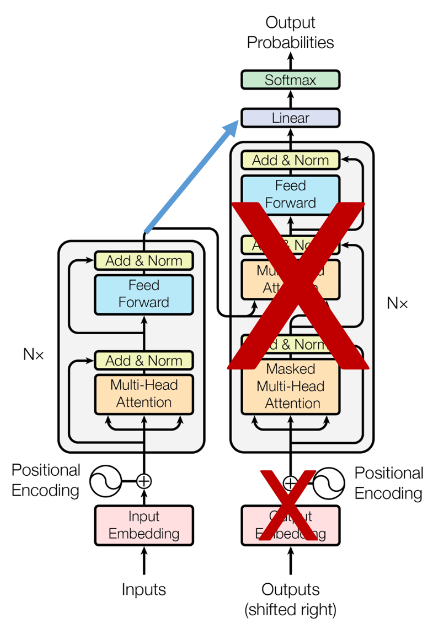

## GPT (Generative Pretrained Transformer)
- 트랜스포머 아키텍처의 디코더만 사용하는데, 그 이유는 GPT의 목표와 학습 방식에 기인.
- GPT는 주어진 문맥에 따라 텍스트를 생성하는 것을 목표로 하며 주어진 입력에 대해 가장 가능성 있는 다음 토큰(일반적으로 단어 또는 단어의 일부)을 예측하는 문제로 볼 수 있다.
- 입력 텍스트를 디코더에 직접 제공하고, 디코더는 각 단계에서 다음 토큰을 예측하게 되어 GPT는 주어진 문맥을 기반으로 텍스트를 생성하는 데 필요한 모델을 학습

#### GPT 토큰화 방법
- GPT(Generative Pretrained Transformer)는 토큰화를 위해 Byte-Pair Encoding(BPE)라는 방법을 사용
- BPE는 원래의 텍스트에서 가장 빈번하게 등장하는 문자열 조합을 찾아서 하나의 새로운 '단어'를 만드는 과정을 반복적으로 수행하여 자주 등장하는 단어는 하나의 토큰으로 묶이고, 그렇지 않은 단어는 여러 개의 토큰으로 분리
- 예를 들어 'lowest'라는 단어가 자주 등장하지 않고, 'low'라는 단어와 'est'라는 문자열이 자주 등장한다면, BPE는 'lowest'를 'low'와 'est' 두 개의 토큰으로 분리.
- 이런 방식으로 BPE는 텍스트를 더 작은 단위로 토큰화할 수 있으며, 이는 GPT와 같은 트랜스포머 기반 모델이 문맥을 보다 정확하게 이해하고, 더 큰 어휘를 처리


#### GPT 학습방법
- 사전 학습 (Pre-training): 이 단계에서 GPT는 대량의 텍스트 데이터를 학습하여 언어의 통계적 패턴을 이해. GPT는 이를 위해 'masked language model'이 아닌 'causal language model'을 사용. 즉, 주어진 문장에서 다음에 올 단어를 예측하는 방식으로 학습. 이 때문에 GPT는 문장을 앞에서부터 뒤로 읽으며 학습하게 되므로, 이를 'auto-regressive' 방식이라고 함.

- 파인 튜닝 (Fine-tuning): 사전 학습 후, GPT는 특정 작업에 대해 파인 튜닝될 수 있다. 이 단계에서는 특정 작업(예: 감성 분석, 질문 응답 등)의 학습 데이터를 사용하여 모델을 학습시킵니다. 이때, 모델의 모든 가중치는 업데이트 가능하며, 파인 튜닝을 통해 특정 작업에 대해 최적화됩니다.

- 따라서, GPT의 학습 방법은 사전 학습과 파인 튜닝 두 가지 주요 단계로 구성됩니다. 사전 학습 단계에서는 언어의 일반적인 패턴을 학습하고, 파인 튜닝 단계에서는 이를 바탕으로 특정 작업에 대해 최적화를 진행한다.

- GPT의 원래 목적은 주어진 문맥에서 다음 단어를 예측하는 것이지만, 이런 방식은 기본적으로 언어의 구조와 문맥을 이해하는 능력을 요구. 따라서 이를 바탕으로 모델을 약간 수정하면, 문맥을 이해하고 특정 작업을 수행할 수 있는 모델을 만들 수 있다.
  - 예를 들어, 감성 분석 작업을 수행하기 위해 GPT를 파인 튜닝하는 경우, 모델의 출력 레이어를 각각의 감성 클래스에 대응하는 노드로 대체한 다음, 감성 레이블이 부여된 데이터셋을 사용하여 모델을 학습시키면, GPT는 입력 텍스트의 감성을 분류하는 데 필요한 패턴을 학습하게 된다.

  - 마찬가지로, 질문 응답 시스템을 구축하기 위해 GPT를 파인 튜닝하는 경우, 모델의 입력을 질문과 문맥, 그리고 가능한 답변의 시작과 끝을 나타내는 토큰으로 구성한 다음, 질문과 그에 대한 정답이 포함된 데이터셋을 사용하여 모델을 학습시키면, GPT는 주어진 문맥에서 질문에 대한 적절한 답변을 생성하는 능력을 학습하게 된다.

  따라서, GPT는 언어 생성 모델이지만, 파인 튜닝을 통해 다양한 자연어 처리 작업에 적용할 수 있다. 이는 GPT가 언어의 복잡한 패턴과 구조를 이해하는 능력을 가지고 있기 때문에 가능한 것이다.







#### GPT 구조 : 트랜스포머에서 인코더를 제외하고 디코더만 사용

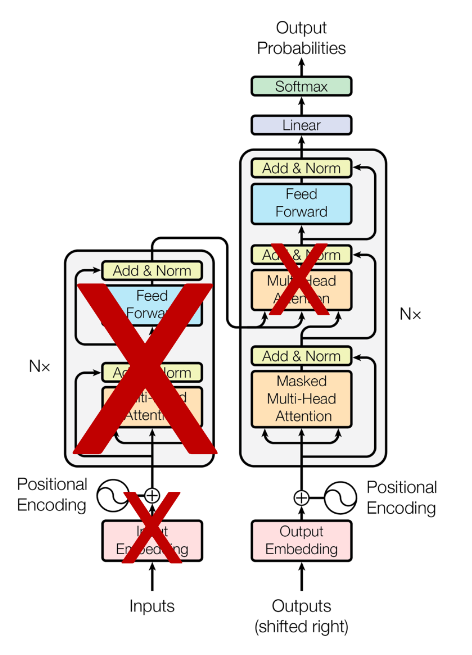

## 파인튜닝

- 문장을 워드피스(wordpiece)로 토큰화한 뒤 앞뒤에 문장 시작과 끝을 알리는 스페셜 토큰 CLS와 SEP를 각각 추가한 뒤 BERT에 입력

- BERT 모델의 마지막 블록(레이어)의 출력 가운데 CLS에 해당하는 벡터를 추출. 트랜스포머 인코더 블록에서는 모든 단어가 서로 영향을 끼치기 때문에 마지막 블록 CLS 벡터는 문장 전체(이 영화 재미없네요)의 의미가 벡터 하나로 응집된 것이다.

- 이렇게 뽑은 CLS 벡터에 작은 모듈을 하나 추가해, 그 출력이 미리 정해 놓은 범주(예컨대 긍정, 중립, 부정)가 될 확률이 되도록 한다. 학습 과정에서는 BERT와 그 위에 쌓은 작은 모듈을 포함한 전체 모델의 출력이 정답 레이블과 최대한 같아지도록 모델 전체를 업데이트. 이것이 파인튜닝(fine-tuning)

- 문서 분류는 마지막 블록의 CLS 벡터만을 사용하는 반면, 개체명 인식 같은 과제에서는 마지막 블록의 모든 단어 벡터를 활용